# Merge data demo
using file  hourly_temp_humid.csv and 002_verwanltung.csv


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')



# Load weather data

In [3]:
# df_weather = pd.read_csv('../data_preprocessing/Processed_data/hourly_temp_humdi.csv')
df_weather = pd.read_csv('../data_preprocessing/Processed_data/hourly_weather.csv')

In [4]:
df_weather

,DateTime,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,11.6,85.0,9.1,0.0,0.0,4.3,220
1,2022-01-01 01:00:00,11.5,85.0,9.1,0.0,0.0,4.2,220
2,2022-01-01 02:00:00,11.4,84.0,8.9,0.0,0.0,3.5,210
3,2022-01-01 03:00:00,11.2,85.0,8.9,0.0,0.0,3.4,200
4,2022-01-01 04:00:00,11.1,86.0,8.8,0.0,0.0,4.4,200
...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,15.9,57.0,7.3,0.0,0.0,7.2,230
8756,2022-12-31 20:00:00,15.6,58.0,7.4,0.0,0.0,5.9,220
8757,2022-12-31 21:00:00,14.8,61.0,7.4,0.0,0.0,4.1,220
8758,2022-12-31 22:00:00,14.1,65.0,7.5,0.0,0.0,2.3,230


In [5]:
df_verwaltung = pd.read_csv('../data_preprocessing/Processed_data/002_verwaltung.csv')

In [6]:
df_verwaltung

,DateTime,electricity_15min_diff,heating_15min_diff
0,2022-01-01 00:00:00,0.00,0.0
1,2022-01-01 00:15:00,1.38,5.0
2,2022-01-01 00:30:00,1.20,5.0
3,2022-01-01 00:45:00,1.37,5.0
4,2022-01-01 01:00:00,1.15,5.0
...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0
35037,2022-12-31 23:15:00,1.64,2.0
35038,2022-12-31 23:30:00,1.87,3.0
35039,2022-12-31 23:45:00,1.65,3.0


In [7]:
df = df_verwaltung.merge(df_weather, on='DateTime', how='left')

In [8]:
df.fillna(method='ffill', inplace=True)

In [9]:
df

,DateTime,electricity_15min_diff,heating_15min_diff,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,0.00,0.0,11.6,85.0,9.1,0.0,0.0,4.3,220.0
1,2022-01-01 00:15:00,1.38,5.0,11.6,85.0,9.1,0.0,0.0,4.3,220.0
2,2022-01-01 00:30:00,1.20,5.0,11.6,85.0,9.1,0.0,0.0,4.3,220.0
3,2022-01-01 00:45:00,1.37,5.0,11.6,85.0,9.1,0.0,0.0,4.3,220.0
4,2022-01-01 01:00:00,1.15,5.0,11.5,85.0,9.1,0.0,0.0,4.2,220.0
...,...,...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,12.9,70.0,7.5,0.0,0.0,4.0,240.0
35037,2022-12-31 23:15:00,1.64,2.0,12.9,70.0,7.5,0.0,0.0,4.0,240.0
35038,2022-12-31 23:30:00,1.87,3.0,12.9,70.0,7.5,0.0,0.0,4.0,240.0
35039,2022-12-31 23:45:00,1.65,3.0,12.9,70.0,7.5,0.0,0.0,4.0,240.0


In [10]:
df.keys()

Index(['DateTime', 'electricity_15min_diff', 'heating_15min_diff',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction'],
      dtype='object')

In [11]:
# Assuming df is your DataFrame and it has a 'DateTime' column
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('DateTime', inplace=True)


In [12]:

# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Merged_data'
output_file = os.path.join(output_folder, '002_verwaltung.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Merged_data\002_verwaltung.csv


# Merge data with holidays

In [13]:
df_with_holidays = pd.read_csv('../data_preprocessing/Processed_data/002_verwaltung_with_holidays.csv')

In [14]:
df_merged_holidays = df_with_holidays.merge(df_weather, on='DateTime', how='left')
# df_with_holidays.fillna(method='ffill', inplace=True)

In [15]:
df_merged_holidays

,DateTime,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,0.00,0.0,True,5,0,False,11.6,85.0,9.1,0.0,0.0,4.3,220.0
1,2022-01-01 00:15:00,1.38,5.0,True,5,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:30:00,1.20,5.0,True,5,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:45:00,1.37,5.0,True,5,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 01:00:00,1.15,5.0,True,5,1,False,11.5,85.0,9.1,0.0,0.0,4.2,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,True,5,23,False,12.9,70.0,7.5,0.0,0.0,4.0,240.0
35037,2022-12-31 23:15:00,1.64,2.0,True,5,23,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,2022-12-31 23:30:00,1.87,3.0,True,5,23,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35039,2022-12-31 23:45:00,1.65,3.0,True,5,23,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_merged_holidays.fillna(method='ffill', inplace=True)

In [17]:
df_merged_holidays

,DateTime,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,0.00,0.0,True,5,0,False,11.6,85.0,9.1,0.0,0.0,4.3,220.0
1,2022-01-01 00:15:00,1.38,5.0,True,5,0,False,11.6,85.0,9.1,0.0,0.0,4.3,220.0
2,2022-01-01 00:30:00,1.20,5.0,True,5,0,False,11.6,85.0,9.1,0.0,0.0,4.3,220.0
3,2022-01-01 00:45:00,1.37,5.0,True,5,0,False,11.6,85.0,9.1,0.0,0.0,4.3,220.0
4,2022-01-01 01:00:00,1.15,5.0,True,5,1,False,11.5,85.0,9.1,0.0,0.0,4.2,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,True,5,23,False,12.9,70.0,7.5,0.0,0.0,4.0,240.0
35037,2022-12-31 23:15:00,1.64,2.0,True,5,23,False,12.9,70.0,7.5,0.0,0.0,4.0,240.0
35038,2022-12-31 23:30:00,1.87,3.0,True,5,23,False,12.9,70.0,7.5,0.0,0.0,4.0,240.0
35039,2022-12-31 23:45:00,1.65,3.0,True,5,23,False,12.9,70.0,7.5,0.0,0.0,4.0,240.0


In [18]:
df_merged_holidays.set_index('DateTime', inplace=True)

In [19]:
df_merged_holidays.keys()

Index(['electricity_15min_diff', 'heating_15min_diff', 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction'],
      dtype='object')

In [20]:
# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Merged_data'
output_file = os.path.join(output_folder, '002_verwaltung_with_holidays.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_merged_holidays.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Merged_data\002_verwaltung_with_holidays.csv


In [21]:
df.keys()

Index(['electricity_15min_diff', 'heating_15min_diff', 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction'],
      dtype='object')

# merge data with indoor features

In [22]:
df_with_indoor_person = pd.read_csv('../data_preprocessing/Processed_data/002_verwaltung_with_holidays_counrs_person.csv')

In [23]:
df_with_indoor_person

,DateTime,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people
0,2022-01-01 00:00:00,0.00,0.0,True,5,0,False,0
1,2022-01-01 00:15:00,1.38,5.0,True,5,0,False,0
2,2022-01-01 00:30:00,1.20,5.0,True,5,0,False,0
3,2022-01-01 00:45:00,1.37,5.0,True,5,0,False,0
4,2022-01-01 01:00:00,1.15,5.0,True,5,1,False,0
...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,True,5,23,False,0
35037,2022-12-31 23:15:00,1.64,2.0,True,5,23,False,0
35038,2022-12-31 23:30:00,1.87,3.0,True,5,23,False,0
35039,2022-12-31 23:45:00,1.65,3.0,True,5,23,False,0


In [24]:
df_merged_count_person = df_with_indoor_person.merge(df_weather, on='DateTime', how='left')

In [25]:
df_merged_count_person

,DateTime,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
0,2022-01-01 00:00:00,0.00,0.0,True,5,0,False,0,11.6,85.0,9.1,0.0,0.0,4.3,220.0
1,2022-01-01 00:15:00,1.38,5.0,True,5,0,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 00:30:00,1.20,5.0,True,5,0,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 00:45:00,1.37,5.0,True,5,0,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 01:00:00,1.15,5.0,True,5,1,False,0,11.5,85.0,9.1,0.0,0.0,4.2,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,True,5,23,False,0,12.9,70.0,7.5,0.0,0.0,4.0,240.0
35037,2022-12-31 23:15:00,1.64,2.0,True,5,23,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,2022-12-31 23:30:00,1.87,3.0,True,5,23,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35039,2022-12-31 23:45:00,1.65,3.0,True,5,23,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_merged_count_person.fillna(method='ffill', inplace=True)

In [27]:
df_merged_count_person.set_index('DateTime', inplace=True)

In [28]:
df_merged_count_person

,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction
DateTime,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.00,0.0,True,5,0,False,0,11.6,85.0,9.1,0.0,0.0,4.3,220.0
2022-01-01 00:15:00,1.38,5.0,True,5,0,False,0,11.6,85.0,9.1,0.0,0.0,4.3,220.0
2022-01-01 00:30:00,1.20,5.0,True,5,0,False,0,11.6,85.0,9.1,0.0,0.0,4.3,220.0
2022-01-01 00:45:00,1.37,5.0,True,5,0,False,0,11.6,85.0,9.1,0.0,0.0,4.3,220.0
2022-01-01 01:00:00,1.15,5.0,True,5,1,False,0,11.5,85.0,9.1,0.0,0.0,4.2,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:00:00,2.12,3.0,True,5,23,False,0,12.9,70.0,7.5,0.0,0.0,4.0,240.0
2022-12-31 23:15:00,1.64,2.0,True,5,23,False,0,12.9,70.0,7.5,0.0,0.0,4.0,240.0
2022-12-31 23:30:00,1.87,3.0,True,5,23,False,0,12.9,70.0,7.5,0.0,0.0,4.0,240.0


In [29]:
df_merged_count_person.keys()

Index(['electricity_15min_diff', 'heating_15min_diff', 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction'],
      dtype='object')

In [30]:
# Add the indoor temperature column
df_merged_count_person['indoor_temperature'] = np.where(df_merged_count_person['is_working_hour'], 22, df_merged_count_person['Temperature'])

# Add the difference column
df_merged_count_person['temperature_difference'] = df_merged_count_person['indoor_temperature'] - df_merged_count_person['Temperature']

In [37]:
print(df_merged_count_person.iloc[-2,:].to_dict())

{'electricity_15min_diff': 1.6499999999068675, 'heating_15min_diff': 3.0, 'is_holiday': True, 'day_of_week': 5, 'hour_of_day': 23, 'is_working_hour': False, 'number_of_people': 0, 'Temperature': 12.9, 'Humidity': 70.0, 'Dewpoint': 7.5, 'Sun Duration': 0.0, 'Precipitation Height': 0.0, 'Wind Speed': 4.0, 'Wind Direction': 240.0, 'indoor_temperature': 12.9, 'temperature_difference': 0.0}


In [296]:
# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Merged_data'
output_file = os.path.join(output_folder, '002_verwaltung_with_holidays_indoor_person_counts.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_merged_count_person.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Merged_data\002_verwaltung_with_holidays_indoor_person_counts.csv


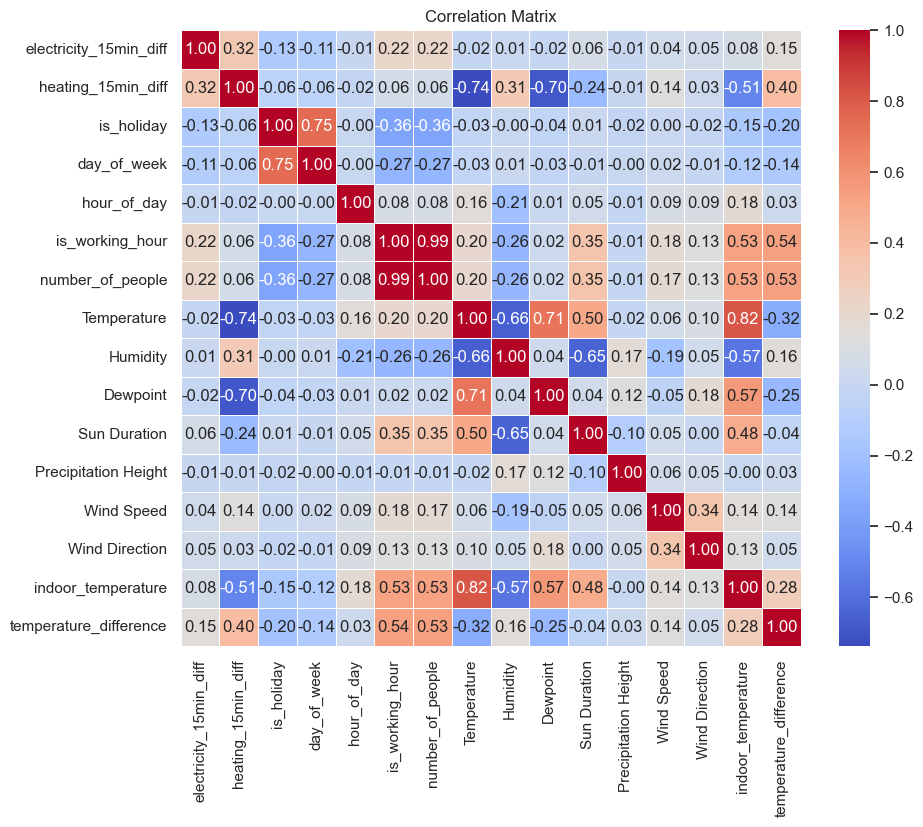

In [297]:

# Calculate the correlation matrix
corr_matrix = df_merged_count_person.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

# Hourly Data Merge

In [313]:
df_hourly = pd.read_csv('../data_preprocessing/Processed_data/002_verwaltung_hourly_with_holidays_counrs_person.csv')

In [314]:
df_hourly

,DateTime,electricity_hourly_diff,heating_hourly_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people
0,2022-01-01 00:00:00,0.0000,0.00,1.0,5.0,0.0,0.0,0.0
1,2022-01-01 01:00:00,5.0575,20.00,1.0,5.0,1.0,0.0,0.0
2,2022-01-01 02:00:00,4.9550,19.75,1.0,5.0,2.0,0.0,0.0
3,2022-01-01 03:00:00,5.0300,19.25,1.0,5.0,3.0,0.0,0.0
4,2022-01-01 04:00:00,6.3300,20.00,1.0,5.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8756,2022-12-31 20:00:00,8.9575,12.00,1.0,5.0,20.0,0.0,0.0
8757,2022-12-31 21:00:00,7.5575,12.00,1.0,5.0,21.0,0.0,0.0
8758,2022-12-31 22:00:00,7.1250,12.00,1.0,5.0,22.0,0.0,0.0
8759,2022-12-31 23:00:00,7.4400,11.25,1.0,5.0,23.0,0.0,0.0


In [315]:
df_hourly_merged_indoor_features = df_hourly.merge(df_weather, on='DateTime', how='left')
df_hourly_merged_indoor_features.fillna(method='ffill', inplace=True)

In [316]:
# List rows with NaN values in df_hourly_merged_indoor_features
nan_rows = df_hourly_merged_indoor_features[df_hourly_merged_indoor_features.isna().any(axis=1)]

# Display the rows with NaN values
nan_rows

,DateTime,electricity_hourly_diff,heating_hourly_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction


In [317]:
df_hourly_merged_indoor_features.set_index('DateTime', inplace=True)

In [318]:
# Add the indoor temperature column
df_hourly_merged_indoor_features['indoor_temperature'] = np.where(df_hourly_merged_indoor_features['is_working_hour'], 22, df_hourly_merged_indoor_features['Temperature'])

# Add the difference column
df_hourly_merged_indoor_features['temperature_difference'] = df_hourly_merged_indoor_features['indoor_temperature'] - df_hourly_merged_indoor_features['Temperature']

In [320]:
df_hourly_merged_indoor_features

,electricity_hourly_diff,heating_hourly_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction,indoor_temperature,temperature_difference
DateTime,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.0000,0.00,1.0,5.0,0.0,0.0,0.0,11.6,85.0,9.1,0.0,0.0,4.3,220.0,11.6,0.0
2022-01-01 01:00:00,5.0575,20.00,1.0,5.0,1.0,0.0,0.0,11.5,85.0,9.1,0.0,0.0,4.2,220.0,11.5,0.0
2022-01-01 02:00:00,4.9550,19.75,1.0,5.0,2.0,0.0,0.0,11.4,84.0,8.9,0.0,0.0,3.5,210.0,11.4,0.0
2022-01-01 03:00:00,5.0300,19.25,1.0,5.0,3.0,0.0,0.0,11.2,85.0,8.9,0.0,0.0,3.4,200.0,11.2,0.0
2022-01-01 04:00:00,6.3300,20.00,1.0,5.0,4.0,0.0,0.0,11.1,86.0,8.8,0.0,0.0,4.4,200.0,11.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,8.9575,12.00,1.0,5.0,20.0,0.0,0.0,15.6,58.0,7.4,0.0,0.0,5.9,220.0,15.6,0.0
2022-12-31 21:00:00,7.5575,12.00,1.0,5.0,21.0,0.0,0.0,14.8,61.0,7.4,0.0,0.0,4.1,220.0,14.8,0.0
2022-12-31 22:00:00,7.1250,12.00,1.0,5.0,22.0,0.0,0.0,14.1,65.0,7.5,0.0,0.0,2.3,230.0,14.1,0.0


In [321]:
# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Merged_data'
output_file = os.path.join(output_folder, '002_verwaltung_hourly_with_holidays_indoor_person_counts.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_hourly_merged_indoor_features.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Merged_data\002_verwaltung_hourly_with_holidays_indoor_person_counts.csv


In [248]:
# df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
# df.set_index('DateTime', inplace=True)

# Define the date ranges for training and test data
train_end_date = df.index.min() + pd.DateOffset(months=9)
test_start_date = train_end_date

# Split the DataFrame
train_data = df[:train_end_date]
test_data = df[test_start_date:]

In [249]:
train_data.tail()

,TT_TU,RF_TU,heating_15min_diff,electricity_15min_diff
DateTime,,,,
2022-09-30 23:00:00,6.5,97.0,3.0,1.36
2022-09-30 23:15:00,6.5,97.0,2.0,1.18
2022-09-30 23:30:00,6.5,97.0,3.0,1.44
2022-09-30 23:45:00,6.5,97.0,3.0,1.18
2022-10-01 00:00:00,6.1,97.0,3.0,1.39


In [250]:
test_data.head ()

,TT_TU,RF_TU,heating_15min_diff,electricity_15min_diff
DateTime,,,,
2022-10-01 00:00:00,6.1,97.0,3.0,1.39
2022-10-01 00:15:00,6.1,97.0,2.0,1.21
2022-10-01 00:30:00,6.1,97.0,3.0,1.41
2022-10-01 00:45:00,6.1,97.0,3.0,1.17
2022-10-01 01:00:00,7.7,96.0,3.0,1.34


# LSTM Model

In [188]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import mean_absolute_error, r2_score


# Custom Dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data, target_col, input_cols, seq_length=10):
        self.data = data
        self.target_col = target_col
        self.input_cols = input_cols
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[self.input_cols].iloc[idx:idx+self.seq_length].values
        y = self.data[self.target_col].iloc[idx+self.seq_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Prepare the data
input_cols = ['TT_TU', 'RF_TU']
target_col = 'electricity_15min_diff'
seq_length = 4

train_dataset = TimeSeriesDataset(train_data, target_col, input_cols, seq_length)
test_dataset = TimeSeriesDataset(test_data, target_col, input_cols, seq_length)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        c_0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])
        return out

input_size = len(input_cols)
hidden_size = 50
output_size = 1
num_layers = 1

model = LSTMModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], avg_epoch_mse_loss:: {avg_epoch_loss:.4f}')

# Evaluate the model
model.eval()
actuals = []
predictions = []
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        test_loss += loss.item()
        actuals.extend(targets.numpy())
        predictions.extend(outputs.numpy().flatten())
    print(f'Test  mse Loss: {test_loss/len(test_loader):.4f}')
    

# Convert lists to numpy arrays for easier plotting
actuals = np.array(actuals)
predictions = np.array(predictions)

# Calculate MAE and R² score
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'Test MAE: {mae:.4f}')
print(f'Test R² Score: {r2:.4f}')


Epoch [1/50], avg_epoch_mse_loss:: 11.2784
Epoch [2/50], avg_epoch_mse_loss:: 11.1357
Epoch [3/50], avg_epoch_mse_loss:: 11.1256
Epoch [4/50], avg_epoch_mse_loss:: 11.1207
Epoch [5/50], avg_epoch_mse_loss:: 11.1167
Epoch [6/50], avg_epoch_mse_loss:: 11.1093
Epoch [7/50], avg_epoch_mse_loss:: 11.1012
Epoch [8/50], avg_epoch_mse_loss:: 11.1096
Epoch [9/50], avg_epoch_mse_loss:: 11.0907
Epoch [10/50], avg_epoch_mse_loss:: 11.0909
Epoch [11/50], avg_epoch_mse_loss:: 11.0971
Epoch [12/50], avg_epoch_mse_loss:: 11.0819
Epoch [13/50], avg_epoch_mse_loss:: 11.0777
Epoch [14/50], avg_epoch_mse_loss:: 11.0818
Epoch [15/50], avg_epoch_mse_loss:: 11.0706
Epoch [16/50], avg_epoch_mse_loss:: 11.0737
Epoch [17/50], avg_epoch_mse_loss:: 11.0674
Epoch [18/50], avg_epoch_mse_loss:: 11.0614
Epoch [19/50], avg_epoch_mse_loss:: 11.0551
Epoch [20/50], avg_epoch_mse_loss:: 11.0714
Epoch [21/50], avg_epoch_mse_loss:: 11.0587
Epoch [22/50], avg_epoch_mse_loss:: 11.0536
Epoch [23/50], avg_epoch_mse_loss:: 11.06

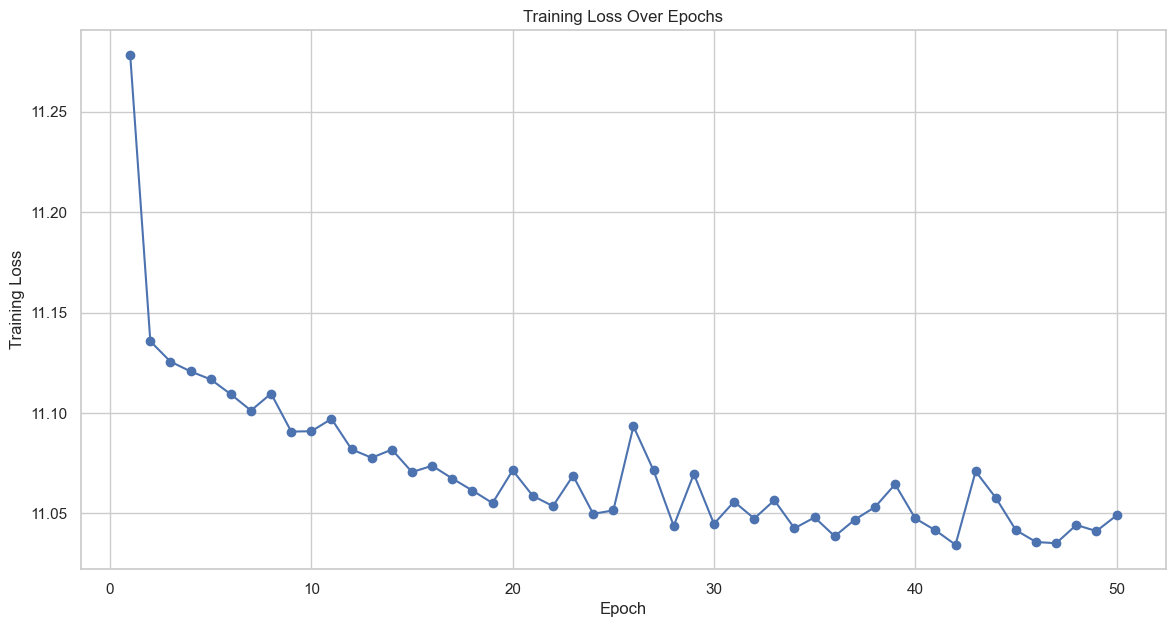

In [189]:
# Plot the training loss
plt.figure(figsize=(14, 7))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

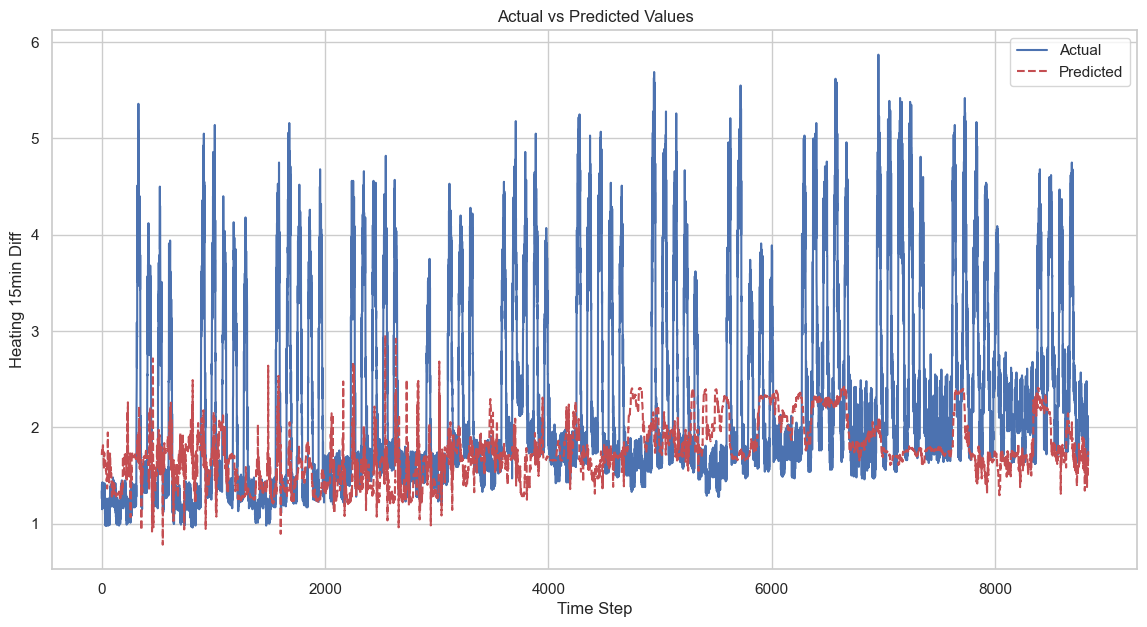

In [190]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(actuals, label='Actual', color='b')
plt.plot(predictions, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [191]:
len(actuals)

8833

In [192]:
len(predictions)

8833

In [193]:
test_data.shape

(8837, 4)

# Random Forest Model

In [194]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Prepare the data
input_cols = ['TT_TU', 'RF_TU']
target_col = 'electricity_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 1.5682
MAE: 0.8958
R² Score: -0.5737


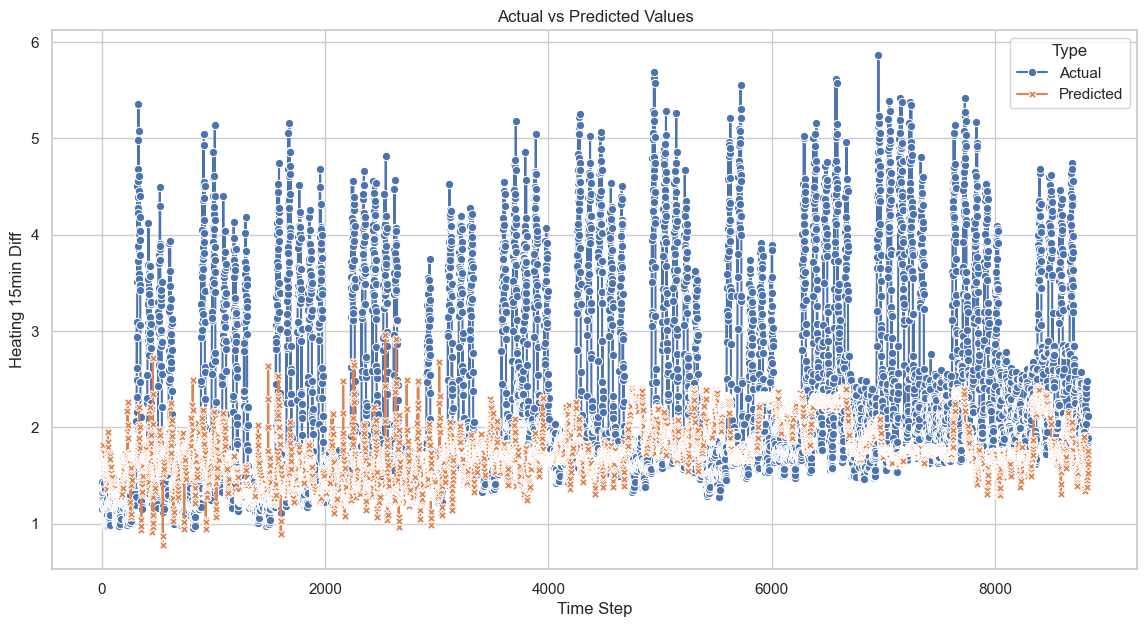

In [195]:
# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({
    'Time Step': range(len(actuals)),
    'Actual': actuals,
    'Predicted': predictions
})

# Melt the DataFrame to long format for Seaborn
df_melted = df_results.melt(id_vars='Time Step', value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Value')

# Plot using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted, x='Time Step', y='Value', hue='Type', style='Type', markers=True, dashes=False)
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

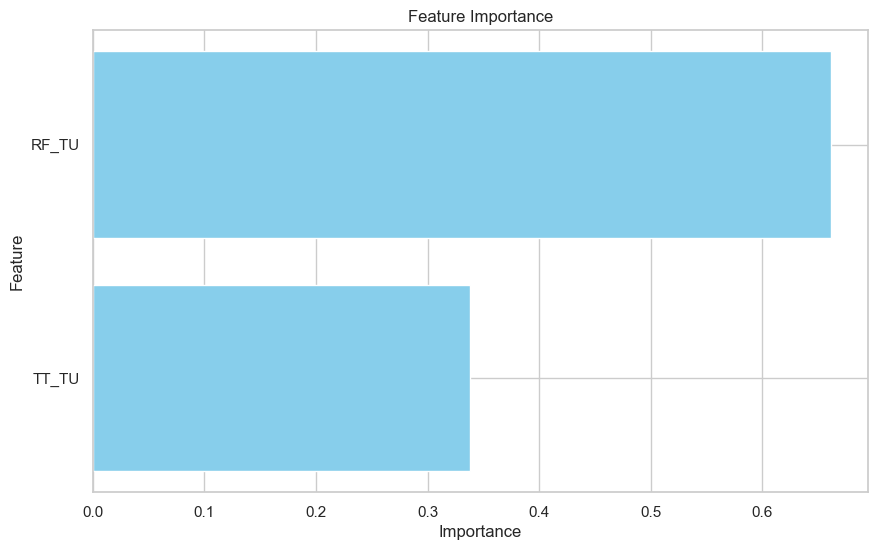

In [196]:
# Assuming `model` is your trained model and `input_cols` are your feature names
feature_importances = model.feature_importances_
features = input_cols

# Create a DataFrame for better visualization
df_feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

# XGBoost Model

In [197]:
from xgboost import XGBRegressor

# Prepare the data
input_cols = ['TT_TU', 'RF_TU']
target_col = 'electricity_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = XGBRegressor(n_estimators=200, random_state=42, objective='reg:squarederror')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 1.4268
MAE: 0.8367
R² Score: -0.4318


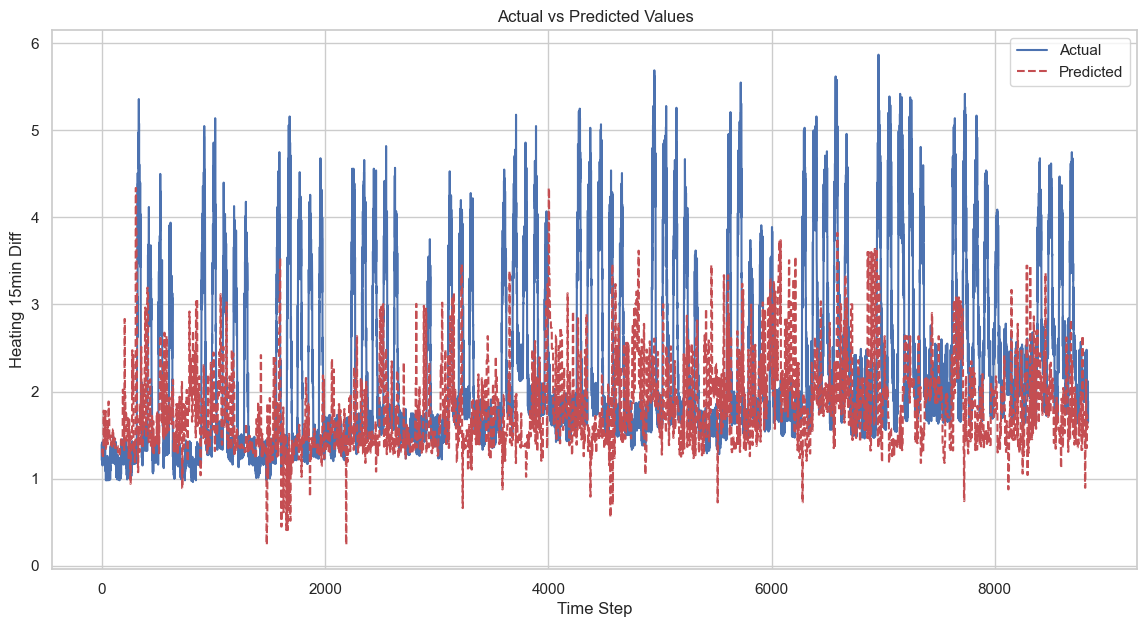

In [198]:
# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({
    'Time Step': range(len(y_test)),
    'Actual': y_test,
    'Predicted': y_pred
})

# Plot using Matplotlib
plt.figure(figsize=(14, 7))
plt.plot(df_results['Time Step'], df_results['Actual'], label='Actual', color='b')
plt.plot(df_results['Time Step'], df_results['Predicted'], label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()# Assuming `model` is your trained model and `input_cols` are your feature names
feature_importances = model.feature_importances_
features = input_cols


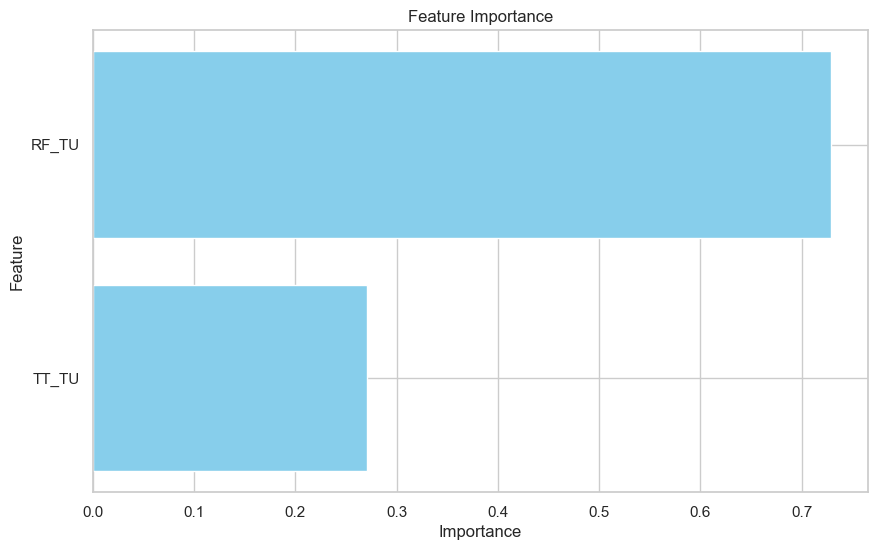

In [199]:

# Create a DataFrame for better visualization
df_feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

# LightGBM Model

In [200]:

import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Prepare the data
input_cols = ['TT_TU', 'RF_TU']
target_col = 'electricity_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = lgb.LGBMRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 26205, number of used features: 2
[LightGBM] [Info] Start training from score 1.928270
MSE: 1.3450
MAE: 0.7799
R² Score: -0.3497


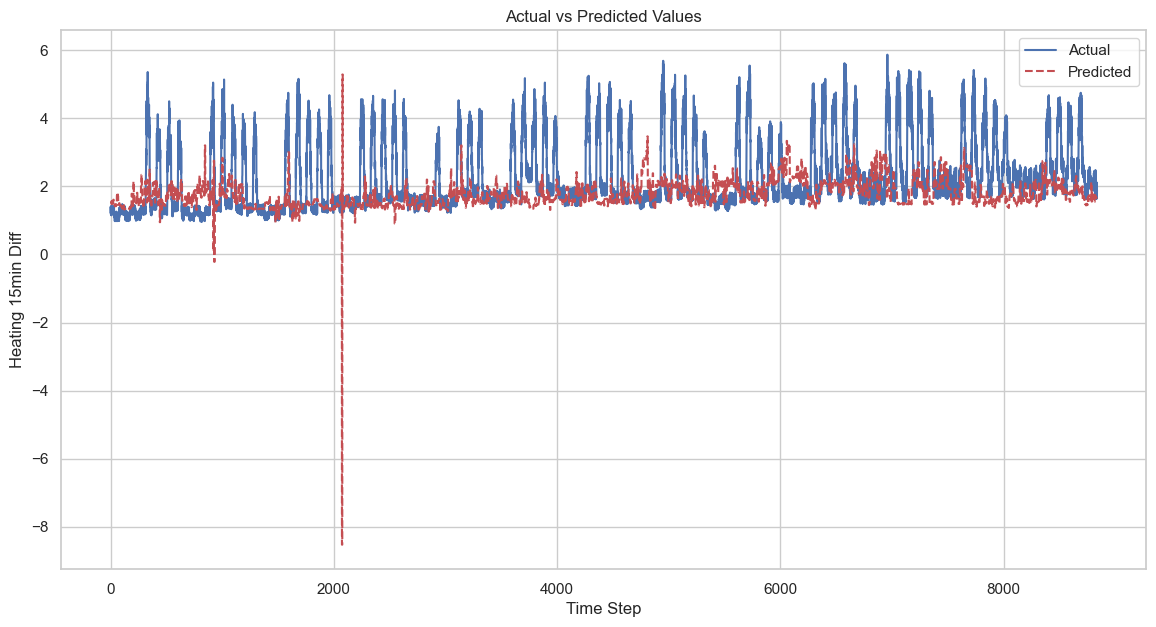

In [201]:
# Create a DataFrame with actual and predicted values
df_results = pd.DataFrame({
    'Time Step': range(len(y_test)),
    'Actual': y_test,
    'Predicted': y_pred
})

# Plot using Matplotlib
plt.figure(figsize=(14, 7))
plt.plot(df_results['Time Step'], df_results['Actual'], label='Actual', color='b')
plt.plot(df_results['Time Step'], df_results['Predicted'], label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

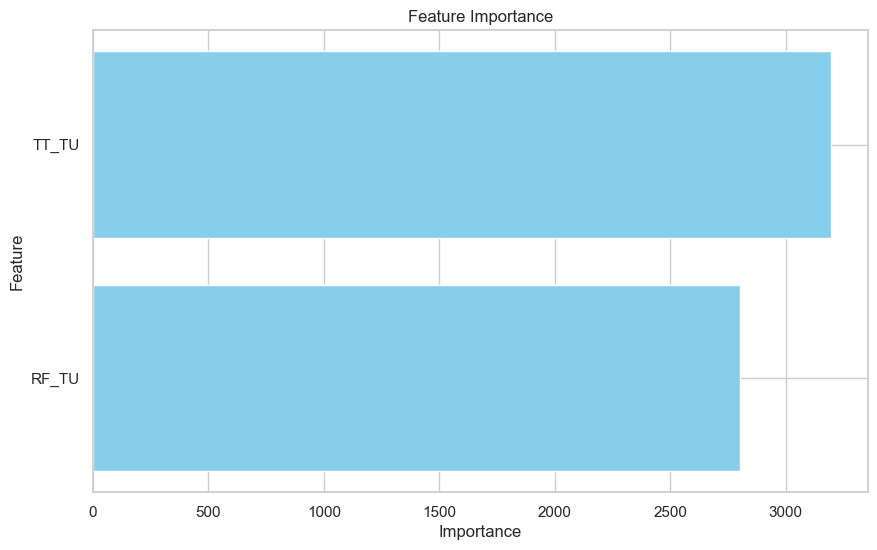

In [202]:
# Assuming `model` is your trained model and `input_cols` are your feature names
feature_importances = model.feature_importances_
features = input_cols

# Create a DataFrame for better visualization
df_feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(True)
plt.show()